# Exercises Discriminant Analysis

In [3]:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from res.Functions import * # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output

## Theoretical questions
> **Goal**: Predict future values from datasets (history).

### Question 1:
- Can you predict the writing hand of the next student based on the specified height (`182`), pieces of fruit (`2`), shoe size (`44`), distance to KdG (`22`)? Only use students who have specified Left or Right as their writing hand.
- Draw up a confusion matrix based on the predicted and effective values for the data you used to perform the discriminant analysis.
- Calculate the usual evaluation metrics for a binary classifier.
- Draw the ROC curve. If applicable, explain why the ROC curve is not drawn.
- What is the accuracy of the discriminant analysis where height and shoe size predict the number of brothers and sisters?

**Name of Columns**: `gapminder` `schrijfhand` `schoenmaat` `lengte` `bloedgroep` `resus` `siblings` `Samenzweringen` `rijbewijs` `domicilie in Antwerpen` `afstudeerrichting` `vrijetijdsbesteding` `uren wiskunde` `informatica` `belangrijk` `uren buiten schooluren` `afstand tot KdG` `vervoersmiddel` `klimaatopwarming` `zakgeld` `stukken fruit` `fruitvoorkeur` `besturingssysteem` `belangrijkste app` `M1 - stelen` `M2 - team` `M3 - beschermen` `M4 - voorbeeld` `M5 - embryo` `M6 - vrijheid` `mascotte` `zwaarste vak` `boeienste vak` `studiepunt`

In [59]:
# Load in data and filter data
data = pd.read_csv('../Data/Data1.csv', delimiter=';', decimal=',')
data = data[(data['schrijfhand'] == 'Rechts') | (data['schrijfhand'] == 'Links')] # Drop row if not equal to right or left-handed
display(data.head())

,gapminder,schrijfhand,schoenmaat,lengte,bloedgroep,resus,siblings,Samenzweringen,rijbewijs,domicilie in Antwerpen,...,M1 - stelen,M2 - team,M3 - beschermen,M4 - voorbeeld,M5 - embryo,M6 - vrijheid,mascotte,zwaarste vak,boeienste vak,studiepunt
0,7/18,Rechts,43.0,184,O,positief,5,De tsunami van 2004 in de Indische Oceaan was ...,Categorie B: Wagens.,"buiten de stad (een dorp, een gehucht, het pla...",...,7,2,8,6,5,4.0,"1=Bever,2=Wasbeer,3=Otter,4=Wolf,5=Poema,6=Pan...",Management 1,Data science 1,16-20 uren
1,3/18,Rechts,42.0,163,Weet ik niet,Weet ik niet,1,Prinses Diana kwam niet per ongeluk om het leven,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,10,5,10,6,7,3.0,"1=Bever,2=Wolf,3=Bizon,4=Otter,5=Panter,6=Poem...",Management 1,Computersystemen 1,<= 10 uren
2,12/18,Rechts,45.0,183,AB,positief,2,Prinses Diana kwam niet per ongeluk om het lev...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,6,3,7,7,10,6.0,"1=Bruine beer,2=Poema,3=Panter,4=Wolf,5=Vos,6=...",Management 1,Programmeren 1 - Java,16-20 uren
3,5/18,Rechts,44.0,175,A,positief,2,De wereld wordt eigenlijk gecontroleerd door e...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,9,10,10,10,10,0.0,"1=Wasbeer,2=Wolf,3=Bruine beer,4=Das,5=Vos,6=B...",Management 1,Data science 1,<= 10 uren
4,6/18,Rechts,43.0,173,B,positief,3,De wereld wordt eigenlijk gecontroleerd door e...,Categorie B: Wagens.,in een stad,...,10,6,10,7,7,2.0,"1=Wolf,2=Vos,3=Bruine beer,4=Bizon,5=Panter,6=...",Management 1,Data science 1,<= 10 uren


In [60]:
# Create linear discriminant analysis model
independentVariables = data[['lengte', 'stukken fruit', 'schoenmaat', 'afstand tot KdG']] # Independent variables
dependentVariable = data['schrijfhand']                                                   # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Predict with test data
testStudent = pd.DataFrame(data={'lengte':[182], 'stukken fruit':[2], 'schoenmaat':[44], 'afstand tot KdG':[22]})
print(colored(f"If you assume that the student has. The following attributes:", outputColor))
for column in testStudent.columns:
    print(colored(f"\t- {column}: {testStudent[column].values}", outputColor))
print(colored(f"Then the probability lies between {lda.predict_proba(testStudent)} that he is {lda.predict(testStudent)} handed.", outputColor))

If you assume that the student has. The following attributes:
	- lengte: [182]
	- stukken fruit: [2]
	- schoenmaat: [44]
	- afstand tot KdG: [22]
Then the probability lies between [[0.09459903 0.90540097]] that he is ['Rechts'] handed.


In [61]:
# Create confusion matrix
predicted = pd.Series(lda.predict(independentVariables), name='Predicted')
actual = dependentVariable.rename('actual')
confusion_matrix = pd.crosstab(index=actual, columns=predicted, margins='All', margins_name='Total')
display(confusion_matrix)

Predicted,Links,Rechts,Total
actual,,,
Links,1,13,14
Rechts,1,74,75
Total,2,87,89


In [62]:
# Evaluating model
accuracy = accuracyf(confusion_matrix)

precision_left = precisionf(confusion_matrix)[0]
precision_right = precisionf(confusion_matrix)[1]

recall_left = recallf(confusion_matrix)[0]
recall_right = recallf(confusion_matrix)[1]

f1_left = f_measuref(confusion_matrix, 1)[0]
f1_right = f_measuref(confusion_matrix, 1)[1]

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the binary classifier is: {round(accuracy, 2) * 100}%\n", outputColor))

# Precision: The number of correct positive predictions divided by the total predictions.
print(colored(f"The precision of the binary classifier for left-handed is: {round(precision_left, 2) * 100}%", outputColor))
print(colored(f"The precision of the binary classifier for right-handed is: {round(precision_right, 2) * 100}%\n", outputColor))

# Recall: The number of correct positive predictions divided by the number of total positives.
print(colored(f"The recall of the binary classifier for left-handed is: {round(recall_left, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for right-handed is: {round(recall_right, 2) * 100}%\n", outputColor))

# F-measuref: The curved harmonic mean of precision and recall.
print(colored(f"The F1-measure of the binary classifier for left-handed is: {round(f1_left, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for right-handed is: {round(f1_right, 2) * 100}%\n", outputColor))

evaluate_classifier(confusion_matrix, 1, 0.9)

The accuracy of the binary classifier is: 46.0%

The precision of the binary classifier for left-handed is: 25.0%
The precision of the binary classifier for right-handed is: 43.0%

The recall of the binary classifier for left-handed is: 4.0%
The recall of the binary classifier for right-handed is: 49.0%

The F1-measure of the binary classifier for left-handed is: 6.0%
The F1-measure of the binary classifier for right-handed is: 46.0%

This is a bad classifier with a threshold of 90.0%


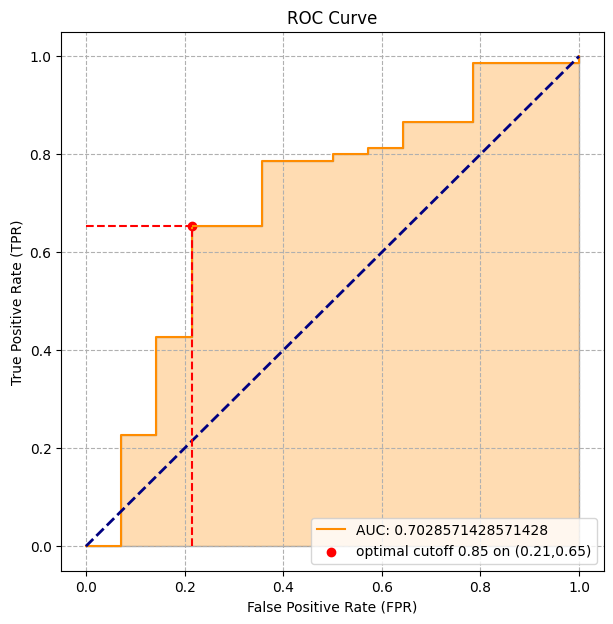

In [63]:
# Create a ROC (Receiver Operator Characteristic Curve) diagram.
y_true = pd.get_dummies(data['schrijfhand'])['Rechts']
y_score = pd.Series(lda.predict_proba(independentVariables)[:, 1])
plot_rocf(y_true, y_score, title='ROC Curve')

In [79]:
# Create linear discriminant analysis model
independentVariables = data[['lengte', 'schoenmaat']] # Independent variables
dependentVariable = data['siblings']                  # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Create confusion matrix
predicted = pd.Series(lda.predict(independentVariables), name='Predicted')
actual = dependentVariable.rename('actual')
confusion_matrix = pd.crosstab(index=actual, columns=predicted, margins='All', margins_name='Total')

# Evaluating model
accuracy = accuracyf(confusion_matrix)
print(colored(f"What is the accuracy when we use two independent variables, length and shoe size to predict the amount of siblings: {round(accuracy, 2) * 100}%", outputColor))

What is the accuracy when we use two independent variables, length and shoe size to predict the amount of siblings: 10.0%


### Question 2:
- Find the dataset `/Data/Bordeaux.csv` and place it in a data frame.
    - Apply a discriminant analysis to this data set with `quality` as the dependent variable and `temperature`, `sun`, `heat` and `rain` as the independent variables.
    - How many dimensions does the discriminant analysis have?
    - Plot the results of the discriminant analysis. What is visualized here?
    - Apply the predict command briefly to the original data. What percentage of the wines receive the same label via the discriminant analysis as observed?

In [65]:
# Load in data and filter data
bordeaux = pd.read_csv('../Data/Bordeaux.csv', delimiter=';')
display(bordeaux.head())

,year,temperature,sun,heat,rain,quality
0,1924,3064,1201,10,361,medium
1,1925,3000,1053,11,338,bad
2,1926,3155,1133,19,393,medium
3,1927,3085,970,4,467,bad
4,1928,3245,1258,36,294,good


In [80]:
# Create linear discriminant analysis model
independentVariables = bordeaux[['temperature', 'sun', 'heat', 'rain']] # Independent variables
dependentVariable = bordeaux['quality']                                 # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Show some information about the discriminant analysis
print(colored(f"There are {(len(dependentVariable.unique()))-1} dimensions and there are {len(dependentVariable.unique())} different possibilities for the dependent variable and also, there are {len(independentVariables.columns)} independent variables.", outputColor))

There are 2 dimensions dimensions and there are 3 different possibilities for the dependent variable and also, there are 4 independent variables.


The plot visualizes the results of the discriminant analysis. So we can easily see the different quality levels of the wines.


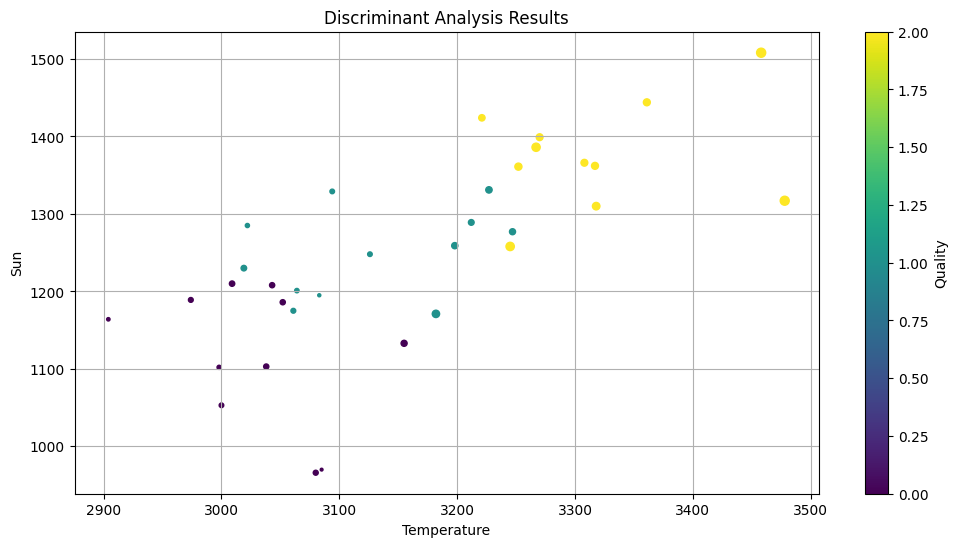

In [82]:
# Visualize the results of the discriminant analysis (quality of the wines)
quality_mapping = {'bad': 0, 'medium': 1, 'good': 2}
bordeaux['quality_code'] = bordeaux['quality'].map(quality_mapping)
dependentVariable_code = bordeaux['quality_code']

lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable_code)

print(colored(f"The plot visualizes the results of the discriminant analysis. So we can easily see the different quality levels of the wines.", outputColor))

plt.figure(figsize=(12, 6))
plt.scatter(independentVariables['temperature'], independentVariables['sun'], independentVariables['heat'], c=lda.predict(independentVariables), cmap='viridis')
plt.colorbar(label='Quality')
plt.xlabel('Temperature')
plt.ylabel('Sun')
plt.title('Discriminant Analysis Results')
plt.grid(True)
plt.show()

In [84]:
# Create linear discriminant analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Evaluating model
predicted = lda.predict(independentVariables)
accuracy = np.mean(predicted == dependentVariable)

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the discriminant analysis model is: {round(accuracy, 2) * 100}%\n", outputColor))

The accuracy of the discriminant analysis model is: 79.0%



### Question 3:
- Find the dataset `/Data/Birthwt.csv` and place it in a data frame.
    - Analyze the type of data in this dataset.
    - Which columns can be used as dependent variables for a discriminant analysis?
    - Which columns can be used as independent variables for a discriminant analysis?
    - Apply a discriminant analysis to this data set (using your choices above).
    - How many dimensions does the discriminant analysis have?
    - Plot the results of the discriminant analysis.

**Name of Columns & Meaning**:
- `low`: Indicator of birth weight less than 2.5 kg
- `age`: Mother's age in years
- `lwt`: Mother's weight in pounds at last menstrual period
- `race`: Mother's race (1 = white, 2 = black, 3 = other)
- `smoke`: Smoking status during pregnancy (1 = yes, 0 = no)
- `ptl`: Number of previous premature labors
- `ht`: History of hypertension (1 = yes, 0 = no)
- `ui`: Presence of uterine irritability (1 = yes, 0 = no)
- `ftv`: Number of physician visits during the first trimester
- `bwt`: Birth weight in grams

In [69]:
# Load in data and filter data
birthwt = pd.read_csv('../Data/Birthwt.csv', delimiter=';')
display(birthwt.head())

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


In [70]:
# Analyze data types
df_info = pd.DataFrame({'Column Name': birthwt.columns, 'Data Type': birthwt.dtypes})
display(df_info.T)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
Column Name,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
Data Type,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [85]:
# Determine which columns are suitable for dependent variables or independent variables categorization
independentVariables, dependentVariables = categorize_variables(birthwt)

print(colored(f"The independent variables are: {independentVariables}", outputColor))
print(colored(f"The dependent variables are: {dependentVariables}", outputColor))

print(colored(f"\nAll variables are dependent variables, therefore you can choose which one you want to make independent for prediction purposes.", outputColor))
print(colored(f"We will choose as dependent variable the 'smoke' column.", outputColor))
print(colored(f"We will choose as independent variables 'age', 'lwt' and 'bwt' because these are not correlated (Derived from).", outputColor))

The independent variables are: ['low', 'age', 'lwt', 'race', 'smoke', 'ptl', 'ht', 'ui', 'ftv', 'bwt', 'LD1']
The dependent variables are: []

All variables are dependent variables, therefore you can choose which one you want to make independent for prediction purposes.
We will choose as dependent variable the 'smoke' column.
We will choose as independent variables 'age', 'lwt' and 'bwt' because these are not correlated (Derived from).


In [86]:
# Create linear discriminant analysis model
independentVariables = birthwt[['age', 'lwt', 'bwt']] # Independent variables
dependentVariable = birthwt['smoke']                  # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Show some information about the discriminant analysis
print(colored(f"There is {(len(dependentVariable.unique()))-1} dimension and there are {len(dependentVariable.unique())} different possibilities for the dependent variable and also, there are {len(independentVariables.columns)} independent variables.", outputColor))

There is 1 dimension and there are 2 different possibilities for the dependent variable and also, there are 3 independent variables.


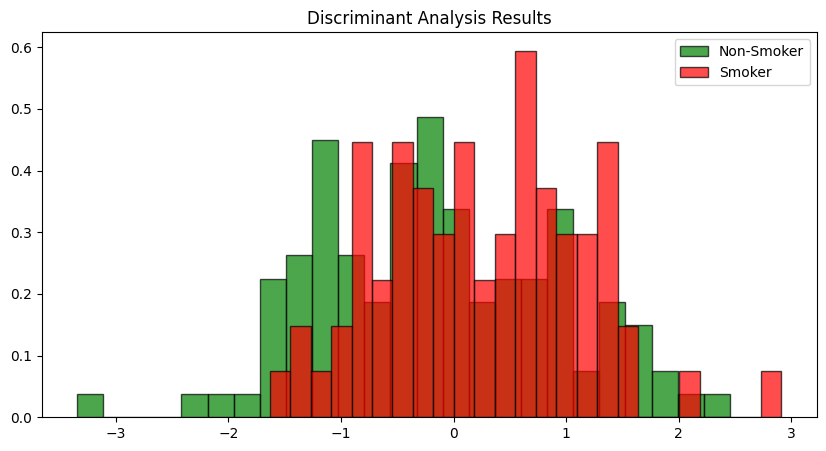

In [73]:
# Visualize the results of the discriminant analysis (smoking status during pregnancy)
birthwt["LD1"] = lda.transform(independentVariables)[:, 0]
plt.figure(figsize=(10, 5))
birthwt['LD1'][birthwt['smoke'] == 0].hist(bins=25, density=True, edgecolor='black', color='green', alpha=0.7, label='Non-Smoker')
birthwt['LD1'][birthwt['smoke'] == 1].hist(bins=25, density=True, edgecolor='black', color='red', alpha=0.7, label='Smoker')
plt.title('Discriminant Analysis Results')
plt.legend()
plt.grid(False)
plt.show()

### Question 4:
- Find the dataset `/Data/Cars93.csv` and place it in a data frame.
    - Analyze the type of data in this dataset.
    - Split the data set into two: the first `90` rows as a `learning data set` for why you are going to apply a discriminant analysis (see 5) and the last 3 rows to check whether the obtained discriminant analysis places these cars in the correct class places (see 7).
    - Which columns can be used as dependent variables for a discriminant analysis?
    - Which columns can be used as independent variables for a discriminant analysis?
    - Apply a discriminant analysis to this data set. Take the Type column as the dependent variable and all usable columns as the independent variables (see 4).
    - How many dimensions does the discriminant analysis have?
    - Apply the obtained discriminant analysis using the predict command to the last 3 rows of the original data (see 2). Will all 3 cars be placed in the correct class?

**Name of Columns & Meaning**:
- `Manufacturer`: Manufacturer of the car
- `Model`: Model of the car
- `Type`: A factor with levels `Small`, `Sporty`, `Compact`, `Midsize`, `Large` and `Van`
- `Min.Price`: Minimum Price (in \$1,000) price of a basic version of the car
- `Price`: Midrange Price (in \$1,000) average of `Min.Price` and `Max.Price`
- `Max.Price`: Maximum Price (in \$1,000) price of `a premium version` of the car
- `MPG.city`: City MPG (miles per US gallon by EPA rating)
- `MPG.highway`: Highway MPG
- `AirBags`: AirBags standard. Factor: `None`, `Driver only`, `Driver` & `Passenger`
- `DriveTrain`: Drive train type: `Real wheel`, `Front wheel` or `4WD` (factor)
- `Cylinders`: Number of cylinders (missing for Mazda RX-7, which has a rotary engine)
- `EngineSize`: Engine size (liters)
- `Horsepower`: Horsepower (maximum)
- `RPM`: RPM (revs per minute at maximum horsepower)
- `Rev.per.mile`: Engine revolutions per mile (in the highest gear)
- `Man.trans.avail`: Is a manual transmission available? Factor with levels `Yes` and `No`
- `Fuel.tank.capacity`: Fuel tank capacity (US gallons)
- `Passengers`: Passenger capacity (persons)
    

In [74]:
# Load in data and filter data
cars93 = pd.read_csv('../Data/Cars93.csv', delimiter=';', decimal='.')
display(cars93.head())

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [75]:
# Analyze data types
df_info = pd.DataFrame({'Column Name': cars93.columns, 'Data Type': cars93.dtypes})
display(df_info)

,Column Name,Data Type
Manufacturer,Manufacturer,object
Model,Model,object
Type,Type,object
Min.Price,Min.Price,float64
Price,Price,float64
Max.Price,Max.Price,float64
MPG.city,MPG.city,int64
MPG.highway,MPG.highway,int64
AirBags,AirBags,object
DriveTrain,DriveTrain,object


In [87]:
# Splitting data
cars93 = cars93.dropna()
learningData = cars93.iloc[:50]         # The 1st 50 rows.
validationData = cars93.iloc[-4:]       # The last 4 rows.

# Determine which columns are suitable for dependent variables or independent variables categorization
independentVariables, dependentVariables = categorize_variables(learningData)

print(colored(f"The independent variables are: {independentVariables}\n", outputColor))
print(colored(f"The dependent variables are: {dependentVariables}", outputColor))

The independent variables are: ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']

The dependent variables are: ['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']


In [88]:
# Create linear discriminant analysis model
independentVariables = learningData[['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 
                                     'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 
                                     'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']]  # Independent variables
dependentVariable = learningData['Type']                                                                                # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Show some information about the discriminant analysis
print(colored(f"There are {(len(dependentVariable.unique()))-1} dimensions and there are {len(dependentVariable.unique())} different possibilities for the dependent variable and also, there are {len(independentVariables.columns)} independent variables.", outputColor))

There are 4 dimensions and there are 5 different possibilities for the dependent variable and also, there are 18 independent variables.


In [89]:
# Predict with validation data
predicted = lda.predict(validationData[['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 
                                     'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 
                                     'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']])

print(colored(f"Predicted values: {predicted}", outputColor))
print(colored(f"Actual values: {validationData['Type'].values}", outputColor))

# Evaluating model
correct = np.mean(predicted == validationData['Type'])
print(colored(f"\nThe percentage of cars that are correctly classified is: {round(correct, 2) * 100}%", outputColor))

predicted = lda.predict(independentVariables)
accuracy = np.mean(predicted == dependentVariable)

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the discriminant analysis model is: {round(accuracy, 2) * 100}%\n", outputColor))

Predicted values: ['Sporty' 'Compact' 'Compact' 'Midsize']
Actual values: ['Sporty' 'Midsize' 'Compact' 'Midsize']

The percentage of cars that are correctly classified is: 75.0%
The accuracy of the discriminant analysis model is: 94.0%

